In [25]:
from maxcut_instance_generator import regular_graph

graph, model = regular_graph(num_nodes=30, degree=3, weighted=False)

In [26]:
from encoding import RandomAccessEncoder

# Quantum Random Access Encoders
qrac = RandomAccessEncoder(3, 1)

# Hamiltonians
H = qrac.generate_hamiltonian(model)

# Print Hamiltonians
print(qrac.print_hamiltonian(H))

(1.5+0j)XIIIXIIIIII
(1.5+0j)XIIIZIIIIII
(1.5+0j)XIIIIIIIIIX
(1.5+0j)YIIIIIIIXII
(1.5+0j)YIIIIYIIIII
(1.5+0j)YIIIIIYIIII
(1.5+0j)ZIIIIZIIIII
(1.5+0j)ZIIIIIIIYII
(1.5+0j)ZIIIIIIIZII
(1.5+0j)IXIIIIZIIII
(1.5+0j)IXIIIIIIIYI
(1.5+0j)IXIIIIIIIZI
(1.5+0j)IYIIYIIIIII
(1.5+0j)IYIIIIIXIII
(1.5+0j)IYIIIIIIIIY
(1.5+0j)IZIIIXIIIII
(1.5+0j)IZIIIYIIIII
(1.5+0j)IZIIIIIIIXI
(1.5+0j)IIIIXIIIXII
(1.5+0j)IIIIXIIIIYI
(1.5+0j)IIIIYIIIZII
(1.5+0j)IIIYYIIIIII
(1.5+0j)IIIIZIIIXII
(1.5+0j)IIIIZIIIZII
(1.5+0j)IIIYIXIIIII
(1.5+0j)IIIIIXIIIIY
(1.5+0j)IIIXIYIIIII
(1.5+0j)IIXIIIXIIII
(1.5+0j)IIXIIIIXIII
(1.5+0j)IIXIIIIIIIY
(1.5+0j)IIIIIZIIYII
(1.5+0j)IIZIIZIIIII
(1.5+0j)IIYIIIXIIII
(1.5+0j)IIYIIIIXIII
(1.5+0j)IIYIIIIIIIZ
(1.5+0j)IIIIIIXIYII
(1.5+0j)IIIIIIYIIIX
(1.5+0j)IIIIIIYIIIZ
(1.5+0j)IIZIIIIIIIX
(1.5+0j)IIZIIIIIIIZ
(1.5+0j)IIIIIIZIIXI
(1.5+0j)IIIIIIZIIZI
(1.5+0j)IIIXIIIIIXI
(1.5+0j)IIIXIIIIIYI
(1.5+0j)IIIYIIIIIZI
(-22.5+0j)IIIIIIIIIII
None


In [27]:
print(len(qrac.qubit_to_vertex_map), len(qrac.calculate_edge_among_qubits(model)))
print(qrac.calculate_edge_among_qubits(model))

11 25
{(3, 4), (4, 9), (5, 10), (0, 5), (1, 6), (0, 8), (2, 5), (1, 9), (6, 8), (3, 9), (4, 8), (0, 4), (0, 10), (2, 7), (1, 5), (2, 10), (6, 10), (3, 5), (5, 8), (1, 4), (0, 6), (1, 7), (2, 6), (1, 10), (6, 9)}


In [28]:
import numpy as np
from vqe import VQEForQRAO

sweeps = 50
num_layer = 1

vqe_0 = VQEForQRAO(
    hamiltonian=H,
    entanglement="linear",
    num_layer=0,
    qubit_pairs=qrac.calculate_edge_among_qubits(model),
    rotation_gate="efficientSU2",
    method="NFT",
    options={"maxfev": (sweeps + 1) * len(qrac.qubit_to_vertex_map) * 2 * (0 + 1) * 2},
)
vqe_5 = VQEForQRAO(
    hamiltonian=H,
    entanglement="linear",
    num_layer=5,
    qubit_pairs=qrac.calculate_edge_among_qubits(model),
    rotation_gate="efficientSU2",
    method="NFT",
    options={"maxfev": (sweeps + 1) * len(qrac.qubit_to_vertex_map) * 2 * (5 + 1) * 2},
)
vqe_10 = VQEForQRAO(
    hamiltonian=H,
    entanglement="linear",
    num_layer=10,
    qubit_pairs=qrac.calculate_edge_among_qubits(model),
    rotation_gate="efficientSU2",
    method="NFT",
    options={"maxfev": (sweeps + 1) * len(qrac.qubit_to_vertex_map) * 2 * (10 + 1) * 2},
)
cost_history_0, best_theta_list_0 = vqe_0.minimize()
print("finish 0")
cost_history_5, best_theta_list_5 = vqe_5.minimize()
print("finish 5")
cost_history_10, best_theta_list_10 = vqe_10.minimize()
print("finish 10")

finish 0


In [5]:
print(len(cost_history_0), len(best_theta_list_0))
print(len(cost_history_5), len(best_theta_list_5))
print(len(cost_history_10), len(best_theta_list_10))

905 18
5424 108
9944 198


In [8]:
from numpy.linalg import eigh
a, b = eigh(qrac.get_hamiltonian_matrix(H))

In [13]:
a

array([-33.55578647, -33.55578647, -32.74971714, -32.74971714,
       -32.21701716, -32.21701716, -32.00589097, -32.00589097,
       -30.98718442, -30.98718442, -30.57217365, -30.57217365,
       -30.52894633, -30.52894633, -30.18921399, -30.18921399,
       -29.79439399, -29.79439399, -29.34322776, -29.34322776,
       -28.88720162, -28.88720162, -28.88143197, -28.88143197,
       -28.58878393, -28.58878393, -28.2450884 , -28.2450884 ,
       -27.82770217, -27.82770217, -27.66728463, -27.66728463,
       -27.3536944 , -27.3536944 , -27.21056576, -27.21056576,
       -26.91313932, -26.91313932, -26.90968393, -26.90968393,
       -26.60782717, -26.60782717, -26.58857588, -26.58857588,
       -26.54898374, -26.54898374, -26.46096281, -26.46096281,
       -25.82858947, -25.82858947, -25.81147656, -25.81147656,
       -25.61491423, -25.61491423, -25.58023315, -25.58023315,
       -25.35676947, -25.35676947, -25.2505633 , -25.2505633 ,
       -25.24065793, -25.24065793, -25.17595371, -25.17

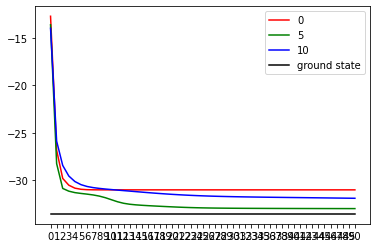

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(cost_history_0[:: len(best_theta_list_0)], color="red", label="0")
plt.plot(cost_history_5[:: len(best_theta_list_5)], color="green", label="5")
plt.plot(cost_history_10[:: len(best_theta_list_10)], color="blue", label="10")
plt.plot([0, sweeps], [a[0], a[0]], color="black", label="ground state")
plt.xticks([i for i in range(sweeps + 1)])
plt.legend()
plt.show()

In [23]:
from rounding import PauliRounding, MagicRounding

pr_0 = PauliRounding(3, 1, 1000, vqe_0, qrac)
mr_0 = MagicRounding(3, 1, 1000, vqe_0, qrac)
presults_0 = pr_0.get_objective_value(model, pr_0.round(best_theta_list_0))
mresults_0 = mr_0.get_objective_value_counts(model, mr_0.round(best_theta_list_0))
pr_5 = PauliRounding(3, 1, 1000, vqe_5, qrac)
mr_5 = MagicRounding(3, 1, 1000, vqe_5, qrac)
presults_5 = pr_5.get_objective_value(model, pr_5.round(best_theta_list_5))
mresults_5 = mr_5.get_objective_value_counts(model, mr_5.round(best_theta_list_5))
pr_10 = PauliRounding(3, 1, 1000, vqe_10, qrac)
mr_10 = MagicRounding(3, 1, 1000, vqe_10, qrac)
presults_10 = pr_10.get_objective_value(model, pr_10.round(best_theta_list_10))
mresults_10 = mr_10.get_objective_value_counts(model, mr_10.round(best_theta_list_10))

In [24]:
print(presults_0, presults_5, presults_10)
print(mresults_0, mresults_5, mresults_10)
print(model.solve())

25.0 25.0 24.0
{17.0: 148, 16.0: 144, 14.0: 138, 15.0: 128, 18.0: 80, 19.0: 75, 13.0: 75, 12.0: 64, 20.0: 47, 11.0: 44, 10.0: 17, 21.0: 16, 9.0: 7, 22.0: 6, 7.0: 2, 6.0: 2, 23.0: 2, 8.0: 2, 3.0: 1, 5.0: 1, 24.0: 1} {16.0: 148, 15.0: 131, 17.0: 128, 14.0: 114, 18.0: 110, 13.0: 96, 19.0: 81, 12.0: 49, 11.0: 43, 20.0: 31, 10.0: 22, 21.0: 18, 9.0: 11, 22.0: 7, 23.0: 5, 8.0: 3, 24.0: 2, 5.0: 1} {16.0: 150, 15.0: 145, 17.0: 123, 14.0: 109, 18.0: 104, 13.0: 93, 19.0: 64, 12.0: 64, 20.0: 41, 11.0: 40, 10.0: 23, 9.0: 15, 21.0: 12, 22.0: 7, 7.0: 4, 8.0: 4, 6.0: 2}
solution for: maxcut
objective: 26
x0=1
x1=1
x2=1
x4=1
x6=1
x8=1
x14=1
x15=1
x18=1
x19=1



In [9]:
from qutip import qeye, sigmax, sigmay, sigmaz, tensor, basis

def state(b_1, b_2, b_3):
    ket_0, ket_1 = basis(2, 0), basis(2, 1)
    cos_theta = np.sqrt(1/2 + np.sqrt(3)/6)
    sin_theta = np.sqrt(1/2 - np.sqrt(3)/6)
    bits_pat = (b_3, b_1, b_2)
    if bits_pat == (0, 0, 0):
        state = cos_theta * ket_0 + np.exp(np.pi * 1j / 4) * sin_theta * ket_1
    elif bits_pat == (0, 0, 1):
        state = cos_theta * ket_0 + np.exp(-np.pi * 1j / 4) * sin_theta * ket_1
    elif bits_pat == (0, 1, 0):
        state = cos_theta * ket_0 + np.exp(np.pi * 3j / 4) * sin_theta * ket_1
    elif bits_pat == (0, 1, 1):
        state = cos_theta * ket_0 + np.exp(-np.pi * 3j / 4) * sin_theta * ket_1
    elif bits_pat == (1, 0, 0):
        state = sin_theta * ket_0 + np.exp(np.pi * 1j / 4) * cos_theta * ket_1
    elif bits_pat == (1, 0, 1):
        state = sin_theta * ket_0 + np.exp(-np.pi * 1j / 4) * cos_theta * ket_1
    elif bits_pat == (1, 1, 0):
        state = sin_theta * ket_0 + np.exp(np.pi * 3j / 4) * cos_theta * ket_1
    elif bits_pat == (1, 1, 1):
        state = sin_theta * ket_0 + np.exp(-np.pi * 3j / 4) * cos_theta * ket_1
    else:
        raise ValueError
    return state

def make_state_from_decoded_results(decoded_results):
    ws_state = None
    for (b_1, b_2, b_3) in zip(decoded_results[0], decoded_results[1], decoded_results[2]):
        if ws_state is None:
            ws_state = state(b_1, b_2, b_3)
        else:
            ws_state = tensor(ws_state, state(b_1, b_2, b_3))
    return ws_state

In [10]:
ws_state = make_state_from_decoded_results(decoded_results).full()

In [26]:
ws_vqe = VQEForQRAO(
    hamiltonian=H,
    entanglement="linear",
    num_layer=num_layer,
    qubit_pairs=qrac.calculate_edge_among_qubits(model),
    rotation_gate="efficientSU2",
    method="NFT",
    options={"maxfev": (sweeps + 1) * len(qrac.qubit_to_vertex_map) * 2 * (num_layer + 1) * 2},
    init_state=ws_state,
    init_params="zero",
)

ws_cost_history, ws_best_theta_list = ws_vqe.minimize()
print("finish")

finish


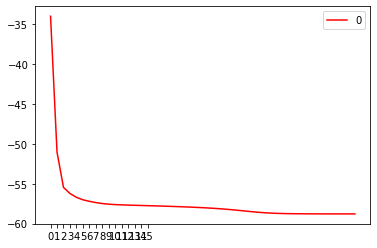

In [20]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(ws_cost_history[:: len(ws_best_theta_list)], color="red", label="0")
plt.xticks([i for i in range(16)])
plt.legend()
plt.show()

In [21]:
ws_pr = PauliRounding(3, 1, 1000, ws_vqe, qrac)
ws_mr = MagicRounding(3, 1, 1000, ws_vqe, qrac)

In [22]:
ws_pr_sol = ws_pr.round(ws_best_theta_list)
ws_pr_val = ws_pr.get_objective_value(model, ws_pr_sol)
print(ws_pr_sol, ws_pr_val)

1101010000001101110100111001000110011101 54.0


In [23]:
pr_sol = pr.round(best_theta_list)
pr_val = pr.get_objective_value(model, pr_sol)
print(pr_sol, pr_val)

1101010000001101110100111001000110011101 54.0


In [24]:
ws_mr_sol = ws_mr.round(ws_best_theta_list)
ws_mr_val = max(list(ws_mr.get_objective_value_counts(model, ws_mr_sol).keys()))
print(ws_mr_val)

41.0


In [25]:
mr_sol = mr.round(best_theta_list)
mr_val = max(list(mr.get_objective_value_counts(model, mr_sol).keys()))
print(mr_val)

43.0
